#### Importing Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Importing Dataset

In [80]:
train_data=pd.read_csv("data/train.csv")
test_data=pd.read_csv("data/test.csv")

### Performing Exploratory Data Analysis

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train_data.shape

(891, 12)

In [34]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Checking various null entries in the dataset, with the help of heatmap

In [36]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Visualization of various relationships between variables

<Axes: xlabel='Survived', ylabel='count'>

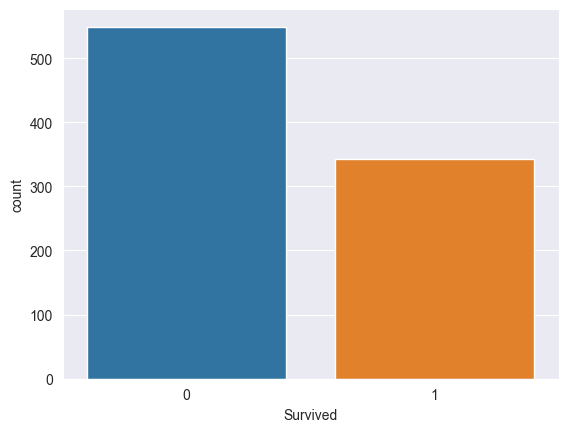

In [37]:
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

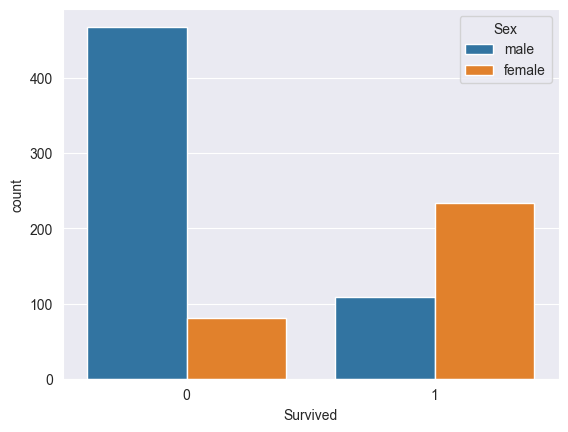

In [38]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

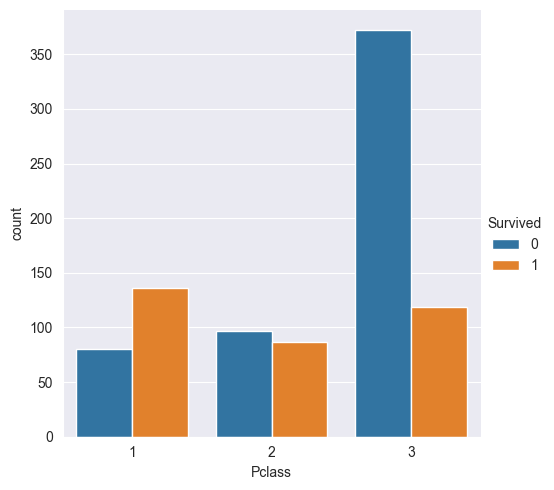

In [39]:
sns.catplot(x='Pclass',hue='Survived', kind='count',data=train_data)

<Axes: xlabel='Pclass', ylabel='Age'>

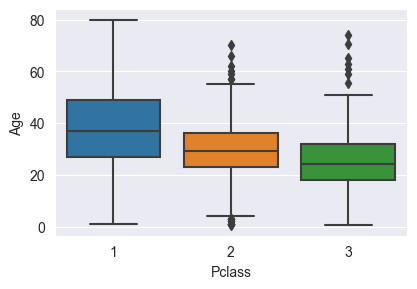

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,6)
sns.boxplot(x='Pclass',y='Age',data=train_data)

#### Replacing null values in Age column using function


In [ ]:
def add_age(cols):
    age, pclass = cols
    if pd.isnull(age):
        if pclass==1:
            return train_data[train_data['Pclass']==1]['Age'].median()
        elif pclass==2:
            return train_data[train_data['Pclass']==2]['Age'].median()
        elif pclass==3:
            return train_data[train_data['Pclass']==3]['Age'].median()
    else:
        return age
        

In [42]:
train_data['Age']=train_data[['Age','Pclass']].apply(add_age, axis=1)

#### Convert sex and embarked columns to numerical values

In [43]:
train_data.Sex=train_data.Sex.map({'female':0, 'male':1})
train_data.Embarked=train_data.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

#### Dropping Null Data

In [44]:
train_data.drop('Cabin',axis=1,inplace=True)

Removing rows with null values

In [45]:
train_data.dropna(inplace=True)

In [46]:
train_data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

#### Feature engineering

In [47]:
min_age=min(train_data.Age)
max_age=max(train_data.Age)
min_fare=min(train_data.Fare)
max_fare=max(train_data.Fare)

In [48]:
train_data.Age = (train_data.Age-min_age)/(max_age-min_age)
train_data.Fare = (train_data.Fare-min_fare)/(max_fare-min_fare)

#### Print the finalised data

In [49]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0


#### Split the data set into x and y data

In [50]:
x_data=train_data.drop('Survived',axis=1)
y_data=train_data['Survived']

#### Split the data set into training data and test data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2, random_state=0, stratify=y_data)

#### Create the model

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

#### Train the model and create predictions

In [56]:
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

#### Let’s see how accurate is our model for predictions:

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       110
           1       0.81      0.79      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [59]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_data, predictions))

Accuracy :  0.848314606741573


#### Let’s see the confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_data, predictions)


array([[97, 13],
       [14, 54]])

### confusion matrix using seaborn

In [61]:
cf_matrix=confusion_matrix(y_test_data, predictions)

<Axes: >

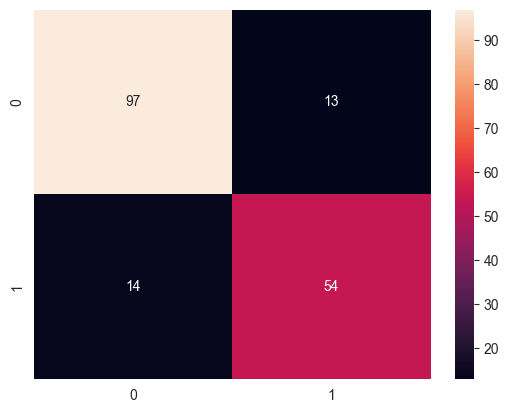

In [62]:


sns.heatmap(cf_matrix, annot=True)

#### Cleaning test datset

In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
test_data['Age']=test_data[['Age','Pclass']].apply(add_age,axis=1)

In [66]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())

In [67]:
test_data.Sex=test_data.Sex.map({'female':0, 'male':1})
test_data.Embarked=test_data.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

In [68]:
min_age1=min(test_data.Age)
max_age1=max(test_data.Age)
min_fare1=min(test_data.Fare)
max_fare1=max(test_data.Fare)

In [69]:
test_data.Age = (test_data.Age-min_age1)/(max_age1-min_age1)
test_data.Fare = (test_data.Fare-min_fare1)/(max_fare1-min_fare1)

In [70]:
test_data.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [71]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [72]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,2
1,3,0,0.617566,1,0,0.013663,0
2,2,1,0.815377,0,0,0.018909,2
3,3,1,0.353818,0,0,0.016908,0
4,3,0,0.287881,1,1,0.023984,0


#### Prediction

In [81]:
pd.get_dummies?

In [73]:
prediction=model.predict(test_data)

In [75]:
test=pd.read_csv("data/test.csv")

In [78]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": prediction})
submission.to_csv('submission.csv', index=False)